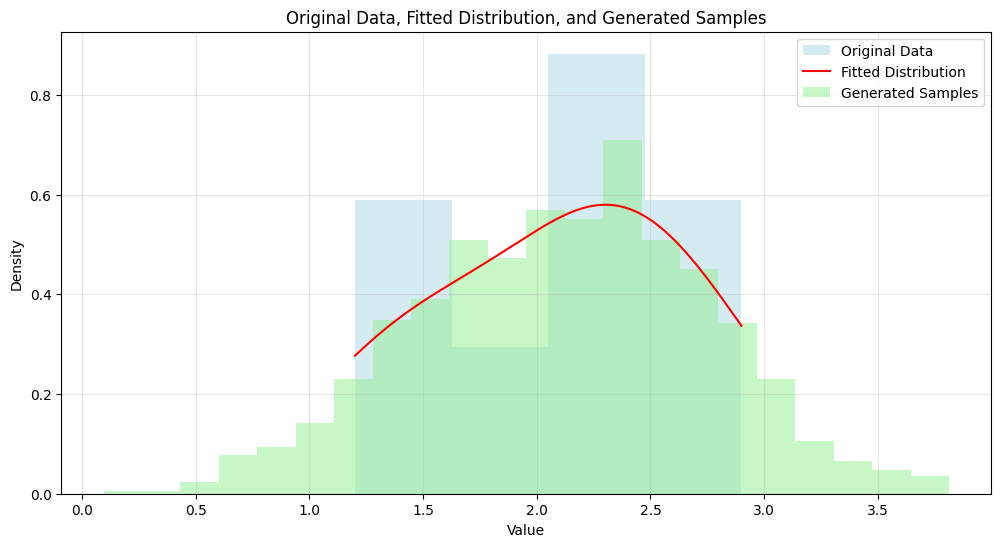


Original Data Statistics:
Mean: 2.10
Std Dev: 0.53

Generated Samples Statistics:
Mean: 2.12
Std Dev: 0.63


In [1]:
import numpy as np
from scipy import stats
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

def generate_distribution(data_points, method='kde', num_points=1000):
    """
    Generate a probability distribution from sparse data points.
    
    Parameters:
    data_points: array-like
        The observed data points
    method: str
        'kde' for Kernel Density Estimation
        'gaussian' for fitting normal distribution
    num_points: int
        Number of points to generate for the distribution
        
    Returns:
    tuple: (x values, probability density values, fitted distribution object)
    """
    data_points = np.array(data_points)
    
    if method == 'kde':
        # Kernel Density Estimation
        kde = gaussian_kde(data_points)
        x_range = np.linspace(min(data_points), max(data_points), num_points)
        density = kde(x_range)
        return x_range, density, kde
        
    elif method == 'gaussian':
        # Fit normal distribution
        mu, std = stats.norm.fit(data_points)
        x_range = np.linspace(min(data_points), max(data_points), num_points)
        density = stats.norm.pdf(x_range, mu, std)
        return x_range, density, stats.norm(mu, std)
    
def generate_samples(distribution, num_samples=100, method='kde'):
    """
    Generate random samples from the fitted distribution.
    
    Parameters:
    distribution: object
        KDE or scipy.stats distribution object
    num_samples: int
        Number of samples to generate
    method: str
        'kde' or 'gaussian'
        
    Returns:
    array: Random samples from the distribution
    """
    if method == 'kde':
        return distribution.resample(num_samples)[0]
    else:
        return distribution.rvs(size=num_samples)

def plot_distribution_and_samples(data_points, x_range, density, samples):
    """
    Plot original points, fitted distribution, and generated samples.
    """
    plt.figure(figsize=(12, 6))
    
    # Plot original data points
    plt.hist(data_points, bins='auto', density=True, alpha=0.5, 
             label='Original Data', color='lightblue')
    
    # Plot fitted distribution
    plt.plot(x_range, density, 'r-', label='Fitted Distribution')
    
    # Plot generated samples
    plt.hist(samples, bins='auto', density=True, alpha=0.5,
             label='Generated Samples', color='lightgreen')
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Original Data, Fitted Distribution, and Generated Samples')
    plt.legend()
    plt.grid(True, alpha=0.3)
    return plt

# Example usage
if __name__ == "__main__":
    # Example with sparse data points
    data = [1.2, 1.5, 1.8, 2.1, 2.3, 2.4, 2.6, 2.9]
    
    # Generate distribution using KDE
    x_range, density, dist = generate_distribution(data, method='kde')
    
    # Generate random samples
    samples = generate_samples(dist, num_samples=1000)
    
    # Plot results
    plot = plot_distribution_and_samples(data, x_range, density, samples)
    plt.show()
    
    # Print summary statistics
    print("\nOriginal Data Statistics:")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Std Dev: {np.std(data):.2f}")
    
    print("\nGenerated Samples Statistics:")
    print(f"Mean: {np.mean(samples):.2f}")
    print(f"Std Dev: {np.std(samples):.2f}")